# 1 Descriptive Statistics

## 1.0

We will load data on monthly stock returns from 1926 to 2021 and store it in a numpy array for you.

In [2]:
# Module for arrays.
import numpy as np
# Module for dataframe manipulation.
import pandas as pd
# Function for downloading from URLs.
from urllib import request 
# Function for constructing interface with ZIP files.
from zipfile import ZipFile 

 # URL of ZIP archive with data.
link = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip'
# Name of local file where ZIP will be stored.
temp = 'F-F_Research_Data_Factors_CSV.zip' 
# Retrieve ZIP file from 'link' and store in local file named 'temp'.
request.urlretrieve(link, temp) 
# Construct interface with ZIP file.
archive = ZipFile(temp) 
# Load the CSV file in the ZIP archive.
csv = archive.open('F-F_Research_Data_Factors.CSV') 
# Read specified number of rows from CSV with line 2 as header.
# Note that knowing which lines to read requires you to have viewed the CSV by another means (e.g. Excel).
df1 = pd.read_csv(csv, header=2, nrows=1140) 

# Store the stock return variable values in a Numpy array.
stocks = df1['Mkt-RF'].values
# Print a preview of the 'stocks' variable.
print(stocks)
# Print the type of the 'stocks' variable.
print(type(stocks))

[2.96 2.64 0.36 ... 4.93 0.29 2.79]
<class 'numpy.ndarray'>


array([-29.13, -23.82, -23.24, ...,  33.84,  37.06,  38.85])

## 1.1

SciPy and NumPy have functions for computing sample

- mean
- variance
- standard deviation
- skewness
- kurtosis
- quantiles

As an exercise, implement your own functions for these descriptive statistics. The functions should be designed to operate on a one-dimensional $\texttt{ndarray}$. You may use other Scipy and Numpy functions in your implementations.  Apply your functions to the $\texttt{stocks}$ data to test them out.

In [20]:
# Import NumPy for array manipulation.
# This is unnecessary here because the module was imported above.
import numpy as np 

# Sample mean.
def my_mean(arr):
    # Sample size (length of array).
    n = len(arr)
    # Sum of array elements divided by sample size.
    return np.sum(arr) / n

# Unbiased sample variance.
def my_var(arr):
    # Sample size.
    n = len(arr)
    # Array of deviations of array elements from sample mean.
    # Note that 'array - scalar' will broadcast the subtraction.
    dev = arr - my_mean(arr)
    # Note the use of Bessel's correction.
    # Note that 'array**2' performs squaring elementwise.
    return np.sum(dev**2) / (n - 1)

# Sample standard deviation derived from unbiased sample variance.
def my_std(arr):
    return np.sqrt(my_var(arr))

# Adjusted Fisher-Pearson coefficient of skewness.
def my_skew(arr):
    # Sample size.
    n = len(arr)
    # Deviations.
    dev = arr - my_mean(arr)
    # Third central sample moment.
    m3 = np.sum(dev**3) / n
    # Second central sample moment.
    m2 = np.sum(dev**2) / n
    # Bias-adjustment cofactor.
    adj = np.sqrt(n*(n-1)) / (n-2)
    return adj * (m3 / m2**(3/2))

# Adjusted Fisher coefficient of kurtosis.
def my_kurt(arr):
    # Sample size.
    n = len(arr)
    # Deviations.
    dev = arr - my_mean(arr)
    # Fourth central sample moment.
    m4 = np.sum(dev**4) / n
    # Second central sample moment.
    m2 = np.sum(dev**2) / n
    # Bias-adjustment cofactor.
    adj = (n-1) / ((n-2)*(n-3))
    return adj * ((n+1)*(m4 / (m2**2)) - (n-1)*3)

# Sample quantile function with linear interpolation.
# q: Quantile to compute. Floating-point number in [0,1].
def my_quant(arr, q):
    # Sample size.
    n = len(arr)
    # Sort array in place by calling the 'sort()' method.
    arr.sort()
    # Indices of points for linear interpolation.
    # Note that 'int()' returns the integer part of a floating-point number.
    i = int(n*q)
    j = i + 1
    # Fractional part of unrounded index.
    # Note the use of the modulus operator '%'.
    frac = n*q % 1
    # Linear interpolation.
    return arr[i] + (arr[j] - arr[i]) * frac

# List of labels to print.
label = ['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis', 'First Quartile', 'Median', \
         'Third Quartile']
# List of statistics.
value = [my_mean(stocks), my_var(stocks), my_std(stocks), my_skew(stocks), my_kurt(stocks), my_quant(stocks, 0.25), \
        my_quant(stocks, 0.50), my_quant(stocks, 0.75)]
# Print table.
print('***My Functions***')
for i in range(len(label)):
    # Print results in two columns.
    # Colon (':') indicates start of format specification.
    # '<' indicates left alignment.
    # '25' indicates field width of 25 characters.
    print('{:<25} {}'.format(label[i], value[i]))

***My Functions***
Mean                      0.6900087719298245
Variance                  28.547579894567413
Standard Deviation        5.342993533083061
Skewness                  0.16487197600823703
Kurtosis                  7.641234428487045
First Quartile            -1.97
Median                    1.06
Third Quartile            3.65


## 1.2

Apply the corresponding SciPy or NumPy functions. Do your functions give different results? If so, are your implementations incorrect, or can you adjust some parameters of the SciPy or NumPy functions to give the same results?

In [22]:
# Import specific functions from SciPy.
from scipy.stats import skew, kurtosis

# List of labels.
label = ['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis', 'First Quartile', 'Median', \
         'Third Quartile']
# List of statistics.
value = [np.mean(stocks), np.var(stocks), np.std(stocks), skew(stocks), kurtosis(stocks), \
         np.quantile(stocks, 0.25), np.quantile(stocks, 0.50), np.quantile(stocks, 0.75)]
# Print table.
print('***SciPy and NumPy Functions, Default Parameters***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], value[i]))
    
# Results differ for variance, standard deviation, skewness, and kurtosis.
# This is because the default parameters set the functions to compute alternative versions of the statistics.

# We can adjust the parameters to match our versions of the statistics.
# Note the extra arguments to the functions.
label = ['Variance', 'Standard Deviation', 'Skewness', 'Kurtosis']
value = [np.var(stocks, ddof=1), np.std(stocks, ddof=1), skew(stocks, bias=False), \
         kurtosis(stocks, bias=False)]
# Newline in between tables.
print('\n')
# Print table.
print('***SciPy and NumPy Functions, Adjusted Parameters***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], value[i]))
    
# Results are now within a roundoff error of each other.
# Roundoff error is due to alternative arithmetic implementation.

***SciPy and NumPy Functions, Default Parameters***
Mean                      0.6900087719298245
Variance                  28.52253815781779
Standard Deviation        5.340649600733771
Skewness                  0.16465495985920908
Kurtosis                  7.602502829277306
First Quartile            -1.97
Median                    1.06
Third Quartile            3.65


***SciPy and NumPy Functions, Adjusted Parameters***
Variance                  28.547579894567413
Standard Deviation        5.342993533083061
Skewness                  0.16487197600823722
Kurtosis                  7.641234428487044


## 1.3

The normal distribution is commonly used to model natural and social phenomena. Investigate whether the hypothesis that the historical stock return is normally distributed is plausible as follows:

- Simulate draws from a normal distribution with the same mean and standard deviation as the stock returns. For the number of draws, use the number of stock return observations. Use a seed of 0.
- Compare descriptive statistics from the simulated data to the descriptive statistics of the stock returns.
- Comment on similarities and differences.

In [26]:
# Import class for normal distribution from SciPy.
# It is customary to import this under an alias because 'norm' is used for vector norms.
from scipy.stats import norm as gaussian

# Number of stock return observations.
n = len(stocks)
# Simulate normal random variables using a method.
sim = gaussian.rvs(loc=np.mean(stocks), scale=np.std(stocks), size=n, random_state=0)

# Print descriptive statistics.
label = ['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis', 'First Quartile', 'Median', \
         'Third Quartile']
value = [np.mean(sim), np.var(sim), np.std(sim), skew(sim), kurtosis(sim), \
         np.quantile(sim, 0.25), np.quantile(sim, 0.50), np.quantile(sim, 0.75)]
print('***SciPy and NumPy Functions, Default Parameters***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], value[i]))
    
# Mean and standard deviation are similar.
# Kurtosis and quantiles are notably different.
# Excess kurtosis (leptokurtosis) is a commonly observed feature of asset returns.
# The hypothesis that the historical stock return is normally distributed is implausible based on differing kurtosis.

***SciPy and NumPy Functions, Default Parameters***
Mean                      0.5197701866992166
Variance                  27.382121236219955
Standard Deviation        5.23279287151899
Skewness                  0.05367265351778994
Kurtosis                  -0.006189000762067742
First Quartile            -3.0217830666186645
Median                    0.458084178609533
Third Quartile            3.9388769539917403


# 2 Visualizing Probability Distributions
A $\text{binomial}(n, p)$ distribution converges to a normal $\mathcal{N}\left(np, np(1-p)\right)$ distribution as $n$ increases. Write a procedure that demonstrates the convergence. The procedure should do the following:

- Take $n$ and $p$ as input.
- Plot the PMF of a $\text{binom}(n,p)$ random variable.
- Plot, over the PMF, the PDF of a normal random variable with mean $np$ and standard deviation $\sqrt{np(1-p)}$.

When you get procedure working, run it with small and then increasing values of $n$ for fixed $p$. Note how in the output plot the binomial PMF gets closer to the normal PDF as you increase $n$.

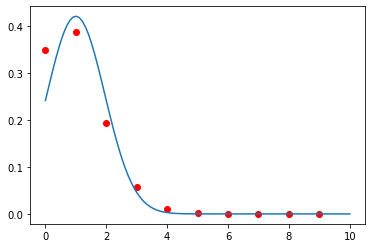

In [59]:
# Import module for plotting.
import matplotlib.pyplot as plt
# Import module for array manipulation.
import numpy as np
# Import class for binomial distribution.
from scipy.stats import binom
# Import class for normal distribution under alias.
from scipy.stats import norm as gaussian

# Set n.
n = 10
# Set p.
p = 0.10

# Support of the binomial random variable.
k = np.arange(n)
# Plot binomial PMF with red dots.
plt.plot(k, binom.pmf(k, n, p), 'ro')
# Create a finer domain for plotting a smoother Gaussian PDF.
x = np.linspace(0, n, 100)
# Plot smooth curve of Gaussian PDF.
plt.plot(x, gaussian.pdf(x, n*p, np.sqrt(n*p*(1-p))))

# Change n and p to see convergence behvaior.